In [1]:
import warnings

warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
data = catalog.load("df_clusters_contract")

                    INFO     Loading data from 'df_clusters_contract' (ParquetDataSet)...       ]8;id=48255;file:///opt/homebrew/Caskroom/miniforge/base/envs/dm_project/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=526308;file:///opt/homebrew/Caskroom/miniforge/base/envs/dm_project/lib/python3.10/site-packages/kedro/io/data_catalog.py#343\343]8;;\

<IPython.core.display.Javascript object>

In [4]:
pca = PCA(n_components=20)
data_pca = pca.fit_transform(data.drop(["index", "log_valor_del_contrato"], axis=1))

<IPython.core.display.Javascript object>

In [5]:
tsne = TSNE(n_components=2)

<IPython.core.display.Javascript object>

In [7]:
data = data[["index", "log_valor_del_contrato"]].copy()

<IPython.core.display.Javascript object>

In [26]:
data_pca = np.concatenate(
    [
        data["log_valor_del_contrato"].values.reshape((-1, 1)),
        data_pca,
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [27]:
cluster = DBSCAN(eps=0.2, min_samples=5).fit_predict(data_pca)

<IPython.core.display.Javascript object>

In [29]:
data["cluster"] = cluster

<IPython.core.display.Javascript object>

In [8]:
data["cluster"] = DBSCAN(eps=0.4, min_samples=4).fit_predict(data_pca)

<IPython.core.display.Javascript object>

In [37]:
pca = PCA(n_components=2)
data_pca_plot = pca.fit_transform(data_pca[:, 1:])

<IPython.core.display.Javascript object>

In [38]:
data[["x", "y"]] = data_pca_plot

<IPython.core.display.Javascript object>

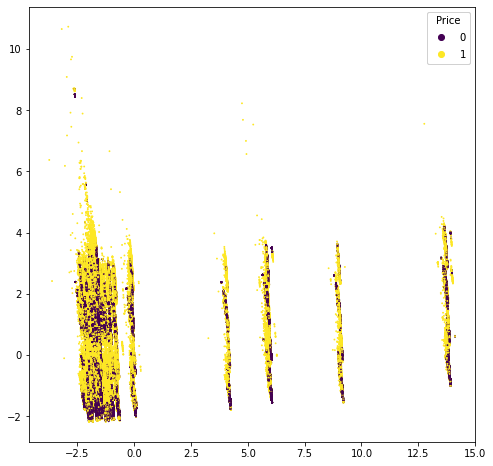

<IPython.core.display.Javascript object>

In [46]:
fig, ax = plt.subplots()
scat = ax.scatter(x=data["x"], y=data["y"], c=data["cluster"] == -1, s=0.7)
legend = ax.legend(*scat.legend_elements(), loc="upper right", title="Outlier")
ax.add_artist(legend)
fig.set_size_inches(8, 8)

In [39]:
data

,index,log_valor_del_contrato,cluster,x,y
0,0,15.661199,0,13.767336,1.893532
1,1,15.884343,0,13.772397,1.848632
2,2,16.284185,0,13.771139,1.850785
3,3,15.863051,0,13.781622,1.764666
4,4,15.984564,0,13.780642,1.764141
...,...,...,...,...,...
1654284,1654284,16.719946,186,5.945008,1.079103
1654285,1654285,16.637028,159,5.909949,1.360846
1654286,1654286,13.994410,-1,-2.058304,-0.351226
1654287,1654287,16.118096,-1,-2.023355,-1.805480


<IPython.core.display.Javascript object>